In [1]:
# PCA Example
# Using the Iris dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
import pandas as pd 
#and suppress deprecation warning 

import warnings

def function_that_warns():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    function_that_warns()  


In [4]:
df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
    )
 
df['target'] = iris.target
df.head()

NameError: name 'iris' is not defined

array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[target]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[target]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[target]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[target]'>]],
      dtype=object)

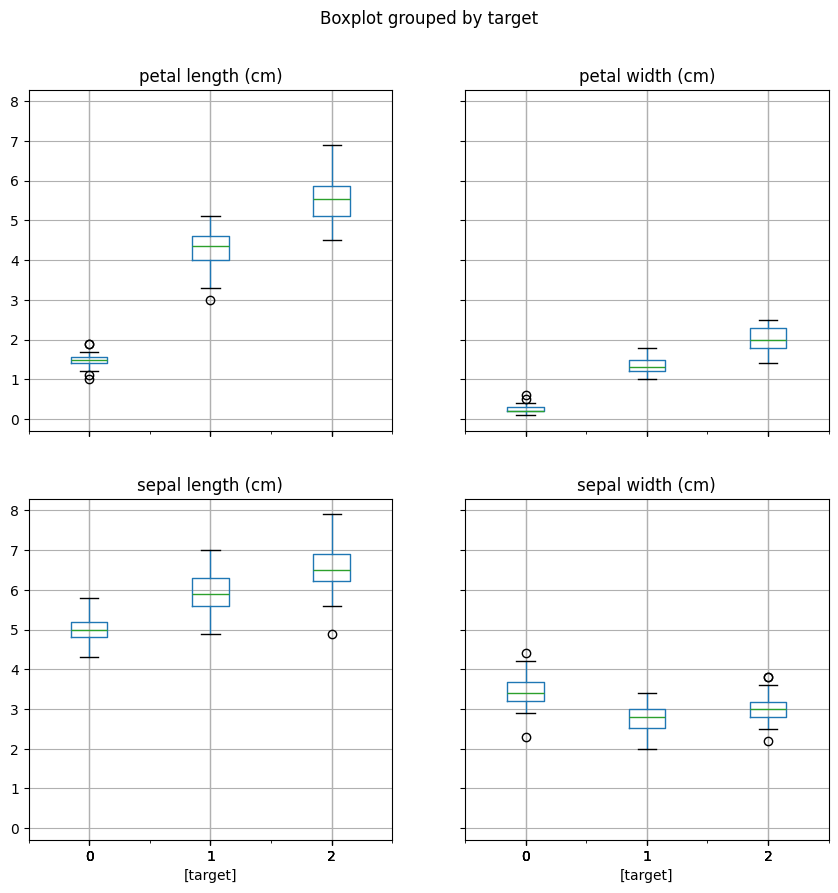

In [ ]:
df.boxplot(by="target", layout=(2, 2), figsize=(10, 10))

In [ ]:
# Now there is data and we can see differences based on features 
# the feature values need to be standardised so when reducing the number of 
# them they are all on the same scale
# Usually any range in a feature is converted 
# to a standardised value between 0 and 1

In [ ]:
df.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Initialize and apply the StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


In [ ]:

df_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16,-1.421085e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,-1.224745e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,-1.224745e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,0.000000e+00
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,1.224745e+00
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,1.224745e+00


array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[target]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[target]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[target]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[target]'>]],
      dtype=object)

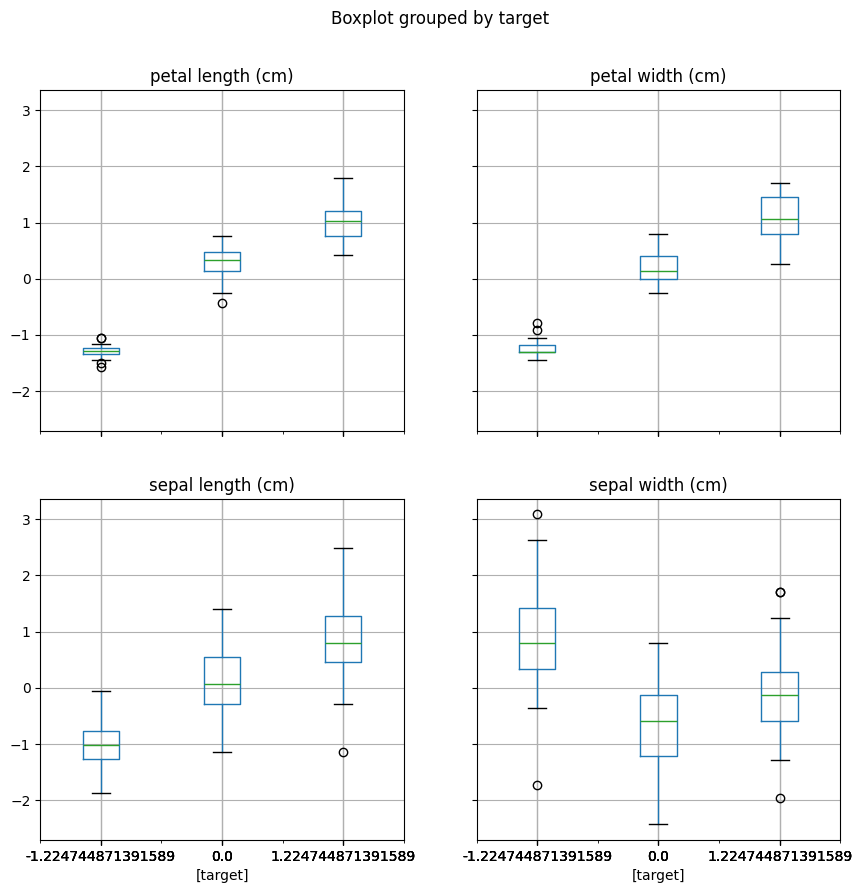

In [ ]:
df_scaled_df.boxplot(by="target", layout=(2, 2), figsize=(10, 10))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_scaled_df)

In [ ]:
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

In [ ]:
# add names to the target column
# depending on the version of the dataset this
# might already be present

#Map targets to target names
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
df['target_names'] = df['target'].map(target_names)



final_df= pd.concat([pca_df, df[['target_names']]], axis = 1)

In [ ]:
final_df.head()

,PC 1,PC 2,target_names
0,-2.576120,0.474499,setosa
1,-2.415322,-0.678092,setosa
2,-2.659333,-0.348282,setosa
3,-2.601991,-0.603306,setosa
4,-2.683744,0.640220,setosa


In [ ]:
final_df.tail()

,PC 1,PC 2,target_names
145,2.233024,0.389352,virginica
146,1.966862,-0.896264,virginica
147,1.928996,0.268890,virginica
148,1.806149,1.009217,virginica
149,1.446001,-0.029041,virginica


In [ ]:
#This has turned 4 dimensions of data to 2 without
#impacting the amount of information available for modelling